In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.datasets as datasets
import sklearn.model_selection as skms
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as skpre
from sklearn import linear_model
import textwrap

!pip install scikit-learn

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

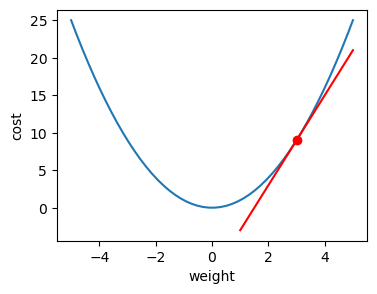

In [4]:
import matplotlib.pyplot as plt

xs = np.linspace(-5, 5)
ys = xs**2

fig, ax = plt.subplots(figsize=(4, 3))
ax.plot(xs, ys)

pt_x, pt_y = 3, 3**2
ax.plot(pt_x, pt_y, 'ro')

line_xs = pt_x + np.array([-2, 2])
line_ys = pt_y + (line_xs - pt_x) * (2 * pt_x)
ax.plot(line_xs, line_ys, 'r-')
ax.set_xlabel('weight')
ax.set_ylabel('cost')

plt.show()

Approximate location of blue graph minimum: 0.0029296875


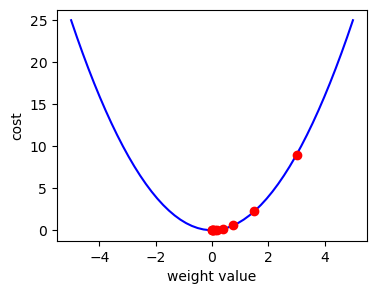

In [5]:
weights = np.linspace(-5,5)
costs = weights**2
fig, ax = plt.subplots(figsize=(4,3))
ax.plot(weights, costs, 'b')

weight_min = 3

for i in range(10):
    cost_at_min = weight_min**2
    ax.plot(weight_min, cost_at_min, 'ro')
    
    slope_at_min = 2*weight_min
    
    step_size = .25
    weight_min = weight_min - step_size * slope_at_min
    
ax.set_xlabel('weight value')
ax.set_ylabel('cost')
print("Approximate location of blue graph minimum:", weight_min)

In [9]:
from scipy.optimize import fmin as magical_minimum_finder

def f(x):
    return x**2

result = magical_minimum_finder(f, [3], disp=False)
print(result)

[-7.10542736e-15]


In [12]:
linreg_ftrs_p1 = np.c_[np.arange(10), np.ones(10)]

true_wgts = m, b = w_1, w_0 = 3, 2
linreg_tgt = np.dot(true_wgts, linreg_ftrs_p1.T)

linreg_table = pd.DataFrame(linreg_ftrs_p1, columns=['ftr_1', 'ones'])
linreg_table['tgt'] = linreg_tgt

display(linreg_table[:3])

,ftr_1,ones,tgt
0,0.0,1.0,2.0
1,1.0,1.0,5.0
2,2.0,1.0,8.0


In [20]:
import numpy as np
from scipy.optimize import fmin as magical_minimum_finder

def linreg_model(weights, features):
    return np.dot(features, weights)

def linreg_loss(predictions, targets):
    errors = predictions - targets
    return np.mean(errors ** 2)

def make_cost(features, targets, model_func, loss_func, regularization_strength, penalty_func):
    def cost(weights):
        predictions = model_func(weights, features)
        loss = loss_func(predictions, targets)
        penalty = regularization_strength * penalty_func(weights)
        return loss + penalty
    return cost

def no_penalty(weights):
    return 0.0

linreg_ftrs_p1 = np.c_[np.arange(10), np.ones(10)]
linreg_tgt = np.dot(true_wgts, linreg_ftrs_p1.T)

linreg_cost = make_cost(linreg_ftrs_p1, linreg_tgt,
                       linreg_model, linreg_loss,
                       0.0, no_penalty)
learned_wgts = magical_minimum_finder(linreg_cost, [5, 5], disp=False)

true_wgts = np.array([3, 2])
print("True weights:", true_wgts)
print("Learned weights:", learned_wgts)

True weights: [3 2]
Learned weights: [2.99998948 2.00003514]


In [1]:
def L1_penalty(weights):
    return np.abs(weights).sum()

def L2_penalty(weights):
    return np.dot(weights, weights)

In [3]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

np.random.seed(42)
n_samples, n_features = 100, 5
X = np.random.rand(n_samples, n_features)
true_wgts = np.random.rand(n_features)
y = X.dot(true_wgts) + np.random.randn(n_samples) * 0.1

L1_penalty = 1.0

linreg_model = Lasso(alpha=L1_penalty)

linreg_model.fit(X, y)

learned_wgts = linreg_model.coef_

print("True weights:", true_wgts)
print("Learned weights:", learned_wgts)

True weights: [0.69816171 0.53609637 0.30952762 0.81379502 0.68473117]
Learned weights: [0. 0. 0. 0. 0.]


In [7]:
from sklearn.linear_model import Ridge

np.random.seed(42)
n_samples, n_features = 100, 5
X = np.random.rand(n_samples, n_features)
true_wgts = np.random.rand(n_features)
y = X.dot(true_wgts) + np.random.randn(n_samples) * 0.1

L2_penalty = 1.0

linreg_model = Ridge(alpha=L2_penalty)

linreg_model.fit(X, y)

learned_wgts = linreg_model.coef_

print("True weights:", true_wgts)
print("Learned weights:", learned_wgts)

True weights: [0.69816171 0.53609637 0.30952762 0.81379502 0.68473117]
Learned weights: [0.58608053 0.49316035 0.28915167 0.68694512 0.63578776]


In [11]:
import pandas as pd
from IPython.display import display

np.random.seed(42)
logreg_ftr = np.random.uniform(5, 15, size=(100,))
true_wgts = m, b = -2, 20
line_of_logodds = m * logreg_ftr + b
prob_at_x = np.exp(line_of_logodds) / (1 + np.exp(line_of_logodds))
logreg_tgt = np.random.binomial(1, prob_at_x, len(logreg_ftr))

logreg_ftrs_p1 = np.c_[logreg_ftr, np.ones_like(logreg_ftr)]  
logreg_table = pd.DataFrame(logreg_ftrs_p1, columns=['ftr_1', 'ones'])
logreg_table['tgt'] = logreg_tgt

display(logreg_table.head())

,ftr_1,ones,tgt
0,8.745401,1.0,1
1,14.507143,1.0,0
2,12.319939,1.0,0
3,10.986585,1.0,0
4,6.560186,1.0,1


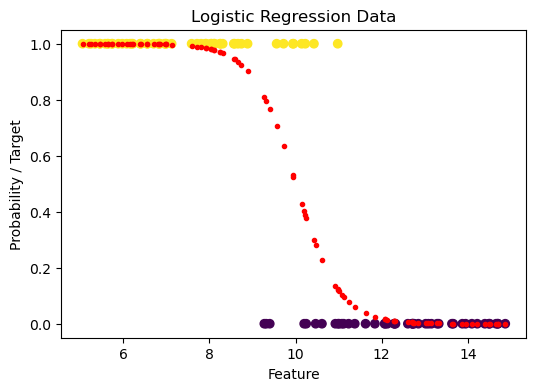

In [14]:
import matplotlib.pyplot as plt
np.random.seed(42)
logreg_ftr = np.random.uniform(5, 15, size=(100,))
true_wgts = m, b = -2, 20
line_of_logodds = m * logreg_ftr + b
prob_at_x = np.exp(line_of_logodds) / (1 + np.exp(line_of_logodds))
logreg_tgt = np.random.binomial(1, prob_at_x, len(logreg_ftr))

# Create a scatter plot
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(logreg_ftr, prob_at_x, 'r.')
ax.scatter(logreg_ftr, logreg_tgt, c=logreg_tgt)

# Set plot labels and title
ax.set_xlabel('Feature')
ax.set_ylabel('Probability / Target')
ax.set_title('Logistic Regression Data')

# Show the plot
plt.show()

In [15]:
def logreg_model(weights, ftrs):
    return rdot(weights, ftrs)

def logreg_loss_01(predicted, actual):
    return np.sum(- predicted * actual + np.log(1+np.exp(predicted)))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

np.random.seed(42)
logreg_ftr = np.random.uniform(5, 15, size=(100,))
true_wgts = m, b = -2, 20
line_of_logodds = m * logreg_ftr + b
prob_at_x = np.exp(line_of_logodds) / (1 + np.exp(line_of_logodds))
logreg_tgt = np.random.binomial(1, prob_at_x, len(logreg_ftr))

logreg_ftrs_p1 = np.c_[logreg_ftr, np.ones_like(logreg_ftr)] 

logreg_model = LogisticRegression()

logreg_model.fit(logreg_ftrs_p1, logreg_tgt)

learned_wgts = logreg_model.coef_[0]

print("True weights:", true_wgts)
print("Learned weights:", learned_wgts)

logreg_predictions = logreg_model.predict_proba(logreg_ftrs_p1)[:, 1]  
logreg_cost = log_loss(logreg_tgt, logreg_predictions)
print("Log Loss (Cost):", logreg_cost)

True weights: (-2, 20)
Learned weights: [-1.65914336e+00  7.26658049e-06]
Log Loss (Cost): 0.15233294828049712


In [20]:
def binary_to_pm1(b):
    return (b*2)-1
binary_to_pm1(0), binary_to_pm1(1)

(-1, 1)

In [30]:
import keras.layers as kl
import keras.models as km
import keras.optimizers as ko

2023-08-10 10:22:43.836151: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
def Keras_LinearRegression(n_ftrs):
    model = km.Sequential()
    
    model.add(kl.Dense(1,
                      activation='linear',
                      input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(lr=0.01), loss='mse')
    return model

In [34]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics

np.random.seed(42)
num_samples = 100
linreg_ftrs = np.random.uniform(5, 15, size=(num_samples,))
true_wgts = m, b = -2, 20
linreg_tgt = m * linreg_ftrs + b + np.random.randn(num_samples) * 0.1

linreg_ftrs_p1 = np.c_[linreg_ftrs, np.ones_like(linreg_ftrs)]  

def Keras_LinearRegression(input_dim):
    model = Sequential()
    model.add(Dense(1, input_dim=input_dim, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

linreg_nn = Keras_LinearRegression(2)  

history = linreg_nn.fit(linreg_ftrs_p1, linreg_tgt, epochs=1000, verbose=0)

preds = linreg_nn.predict(linreg_ftrs_p1)

mse = metrics.mean_squared_error(preds, linreg_tgt)

print("Training MSE: {:5.4f}".format(mse))

2023-08-10 10:31:23.726518: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


4/4 [==============================] - 0s 2ms/step
Training MSE: 24.7423


In [35]:
history.history['loss'][:5]

[187.5604248046875,
 186.3565216064453,
 185.15744018554688,
 183.96205139160156,
 182.77684020996094]

In [36]:
def Keras_LogisticRegression(n_ftrs):
    model = km.Sequential()
    model.add(kl.Dense(1,
                      activation='sigmoid',
                      input_dim=n_ftrs))
    model.compile(optimizer=ko.SGD(), loss='binary_crossentropy')
    return model
logreg_nn = Keras_LogisticRegression(1)
history = logreg_nn.fit(logreg_ftr, logreg_tgt, epochs=1000, verbose=0)

preds = logreg_nn.predict(logreg_ftr) > .5
print('accuracy:', metrics.accuracy_score(preds, logreg_tgt))

4/4 [==============================] - 0s 1ms/step
accuracy: 0.91


In [38]:
!pip install pymc3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 kB 10.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.3 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.3 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.2/33.2 MB 36.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 23.6 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 39.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━